Swiss Canyon Trail

# Libraries

In [1]:
import pandas as pd
import numpy as np

# Graphs
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import files

In [2]:
results_16 = pd.read_csv('export-results-16k-couvet16k.csv',sep=';')
results_31 = pd.read_csv('export-results-31k-arrivee31k.csv',sep=';')
results_51 = pd.read_csv('export-results-51k-arrivee51k.csv',sep=';')
results_81 = pd.read_csv('export-results-81k-arrivee81k.csv',sep=';')
results_111 = pd.read_csv('export-results-111k-arrivee111k.csv',sep=';')

# Create a unique dataframe

In [3]:
# Check if dataframes have the same columns
data_frames = [results_16, results_31, results_51, results_81, results_111]
columns = list(map(lambda x: list(x.columns), data_frames))
data = pd.DataFrame(columns)
data = data.fillna("")
data.drop_duplicates(keep="first", inplace=True)
if len(data) > 1:
  print("DIFFERENT COLUMNS")

In [4]:
# Get all column names
list(results_16.columns)

['classement scratch',
 'dossard',
 'nom prenom',
 'club',
 'sexe',
 'categorie',
 'pays',
 'classement par categorie',
 'classement par sexe',
 'temps',
 'nb de point',
 'Unnamed: 11']

In [5]:
# Check values of the last column
for df in data_frames:
    print(df['Unnamed: 11'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]


In [6]:
# Rename last unused column
for df,i in zip(data_frames, [16,31,51,81,111]):
    df.rename(columns={'Unnamed: 11': 'distance'}, inplace=True)
    df['distance'] = df['distance'].fillna(i).astype(int)

In [7]:
# Merge all dataframes
df = pd.concat(data_frames)
df.head()

,classement scratch,dossard,nom prenom,club,sexe,categorie,pays,classement par categorie,classement par sexe,temps,nb de point,distance
0,1.0,4171,CESCHI FRANCESCO,SCARPA KARPOS SWISS TRAIL YOUTH TEAM,H,Elite,SUI,1.0,1.0,01:11:44,0,16
1,2.0,4623,BONJOUR ALLAN,NaN,H,Elite,SUI,2.0,2.0,01:12:48,0,16
2,3.0,4541,JACOT-DESCOMBES GIL,NaN,H,Elite,SUI,3.0,3.0,01:13:11,0,16
3,4.0,4205,ANGELOT PIERRE,NaN,H,Elite,FRA,4.0,4.0,01:13:29,0,16
4,5.0,4576,VAUTHIER MATTHIAS,CHAMONIX MONT-BLANC MARATHON,H,Elite,SUI,5.0,5.0,01:16:48,0,16


# 0. Data Quality

## General information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2246 entries, 0 to 333
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classement scratch        2242 non-null   float64
 1   dossard                   2246 non-null   int64  
 2   nom prenom                2246 non-null   object 
 3   club                      842 non-null    object 
 4   sexe                      2246 non-null   object 
 5   categorie                 2246 non-null   object 
 6   pays                      2246 non-null   object 
 7   classement par categorie  2242 non-null   float64
 8   classement par sexe       2242 non-null   float64
 9   temps                     2246 non-null   object 
 10  nb de point               2246 non-null   int64  
 11  distance                  2246 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 228.1+ KB


## Missing data

In [9]:
df.isna().sum()

classement scratch             4
dossard                        0
nom prenom                     0
club                        1404
sexe                           0
categorie                      0
pays                           0
classement par categorie       4
classement par sexe            4
temps                          0
nb de point                    0
distance                       0
dtype: int64

In [10]:
# Check missing values
df[df['classement scratch'].isnull()]

,classement scratch,dossard,nom prenom,club,sexe,categorie,pays,classement par categorie,classement par sexe,temps,nb de point,distance
511,NaN,2296,FISCHER MARCO,TRAIL-MANIACS,H,Elite,SUI,NaN,NaN,--:--:--,0,51
331,NaN,212,GUIAVARCH THOMAS,UN BON APÉRO,H,Elite,FRA,NaN,NaN,--:--:--,0,111
332,NaN,156,DEBRIS MATTHIEU,UNIK STUDIO TEAM,H,Senior 2,FRA,NaN,NaN,--:--:--,0,111
333,NaN,167,BROQUET EDDY,NaN,H,Senior 1,SUI,NaN,NaN,--:--:--,0,111


4 abandon de course

## Retrait des abandons

In [11]:
# Drop des abandons
df_finish = df[~df['classement scratch'].isnull()]

## Description des données

In [12]:
df_finish.describe(include='all')

,classement scratch,dossard,nom prenom,club,sexe,categorie,pays,classement par categorie,classement par sexe,temps,nb de point,distance
count,2242.000000,2242.000000,2242,839,2242,2242,2242,2242.000000,2242.000000,2242,2242.0,2242.000000
unique,NaN,NaN,2240,581,2,7,52,NaN,NaN,2070,NaN,NaN
top,NaN,NaN,WEHREN MAUDE,TAG HEUER,H,Elite,SUI,NaN,NaN,02:03:23,NaN,NaN
freq,NaN,NaN,2,26,1533,1072,1064,NaN,NaN,4,NaN,NaN
mean,248.956735,2689.574487,NaN,NaN,NaN,NaN,NaN,51.835415,145.098573,NaN,0.0,48.555754
std,161.337807,1410.366797,NaN,NaN,NaN,NaN,NaN,44.830795,99.323215,NaN,0.0,32.152134
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.0,16.000000
25%,113.000000,2008.250000,NaN,NaN,NaN,NaN,NaN,16.000000,61.000000,NaN,0.0,16.000000
50%,225.000000,3069.500000,NaN,NaN,NaN,NaN,NaN,41.000000,131.000000,NaN,0.0,31.000000
75%,376.000000,4008.500000,NaN,NaN,NaN,NaN,NaN,73.750000,216.000000,NaN,0.0,51.000000


## Retrait de la colonne nb de point

In [13]:
# Values of nb de point column
df_finish['nb de point'].unique()

array([0])

In [14]:
# Drop
df_finish = df_finish.drop('nb de point', axis=1)

## Check des catégories

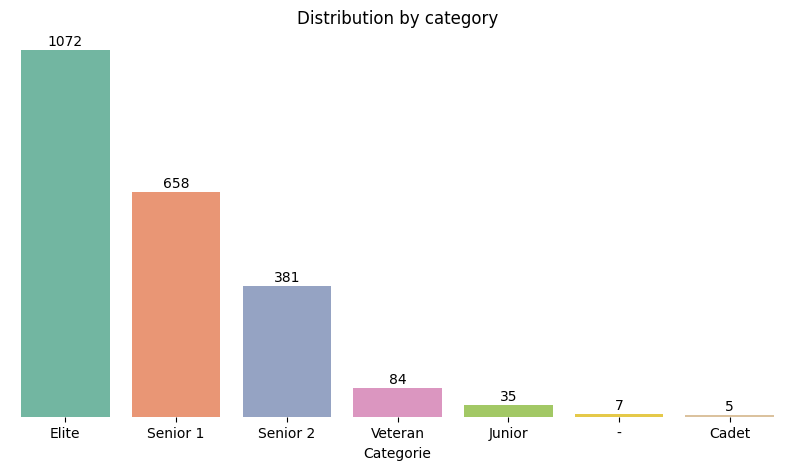

In [15]:
fig = plt.figure(figsize = (10, 5))

# Count plot
ax = sns.countplot(data = df_finish,
                 x = "categorie",
                 palette = "Set2",
                 order = df_finish['categorie'].value_counts().index)

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Categorie")
ax.yaxis.set_visible(False)
plt.title("Distribution by category")

# Add the values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()+25), 
                ha='center', va='center')

plt.show()

In [16]:
df_finish[df_finish['categorie'] == '-']

,classement scratch,dossard,nom prenom,club,sexe,categorie,pays,classement par categorie,classement par sexe,temps,distance
563,564.0,2662,16K FERMEUR 2,NaN,H,-,SUI,1.0,274.0,05:57:47,16
564,565.0,2663,16K FERMEUR 3,NaN,H,-,SUI,2.0,275.0,05:57:48,16
565,566.0,2661,16K FERMEUR 1,NaN,H,-,SUI,3.0,276.0,05:57:51,16
609,610.0,2660,31K FERMEUR 2,NaN,H,-,SUI,1.0,404.0,08:05:26,31
104,105.0,2596,INNOKENTY SMORCHKOV,RUNNING CHICKENS,H,-,SUI,1.0,95.0,06:16:11,51
508,509.0,2657,51K FERMEUR 1,NaN,H,-,SUI,2.0,371.0,10:38:54,51
510,511.0,2658,51K FERMEUR 2,NaN,H,-,SUI,3.0,373.0,10:38:56,51


## Retrait des fermeurs

In [17]:
# Drop fermeurs
df_finish = df_finish[~df_finish['nom prenom'].str.contains('FERMEUR')]

## Fill-in missing value

In [18]:
df_finish[df_finish.categorie=='-']

,classement scratch,dossard,nom prenom,club,sexe,categorie,pays,classement par categorie,classement par sexe,temps,distance
104,105.0,2596,INNOKENTY SMORCHKOV,RUNNING CHICKENS,H,-,SUI,1.0,95.0,06:16:11,51


In [19]:
df_finish.loc[df_finish['dossard'] == 2596, 'categorie'] = 'Elite'

## Convertir la colonne "temps" en temps

In [20]:
# Convertir la colonne 'temps' en timedelta
df_finish['temps'] = pd.to_timedelta(df_finish['temps'])

In [21]:
# Convertir la colonne 'temps' en secondes
df_finish['temps_seconds'] = df_finish['temps'].dt.total_seconds()

# Save data file

In [22]:
df_finish.to_csv('df_finish.csv', index=False) 

# 1. Analyse de la Participation

## **Participation par Sexe** : 
Comparer le nombre de participants masculins et féminins pour chaque course (16km, 31km, 51km, 81km, 111km).

### General

In [23]:
df_sexe = df_finish.sexe.value_counts(normalize=True).to_frame("distribution").reset_index()
df_sexe

,sexe,distribution
0,H,0.682916
1,F,0.317084


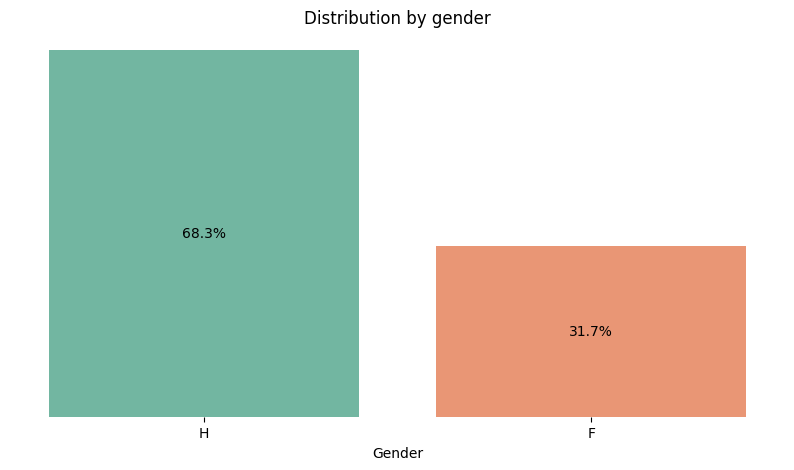

In [24]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.barplot(data = df_sexe,
                 x = "sexe",
                 y =  "distribution",
                 palette = "Set2")

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Gender")
ax.yaxis.set_visible(False)
plt.title("Distribution by gender")

# Add the values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2, p.get_height()/2), 
                ha='center', va='center')

plt.show()

### Par distance

In [25]:
df_sexe_distance = df_finish.groupby(['sexe', 'distance']).count()['dossard'].to_frame('distribution').reset_index()
df_sexe_distance['total_distance'] = df_sexe_distance.groupby('distance')['distribution'].transform('sum')
df_sexe_distance['percentage_distance'] = df_sexe_distance['distribution'] / df_sexe_distance['total_distance']
df_sexe_distance

,sexe,distance,distribution,total_distance,percentage_distance
0,F,16,290,563,0.515098
1,F,31,206,610,0.337705
2,F,51,138,509,0.271120
3,F,81,38,223,0.170404
4,F,111,37,331,0.111782
5,H,16,273,563,0.484902
6,H,31,404,610,0.662295
7,H,51,371,509,0.728880
8,H,81,185,223,0.829596
9,H,111,294,331,0.888218


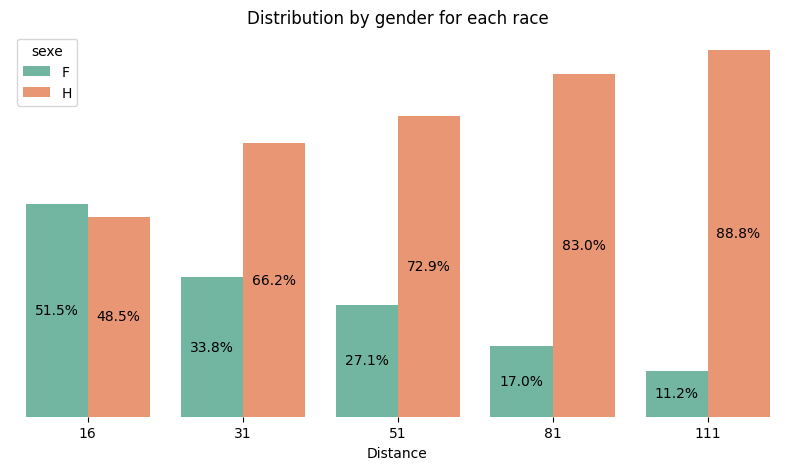

In [26]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.barplot(data = df_sexe_distance,
                 x = "distance",
                 y =  "percentage_distance",
                 hue = "sexe",
                 palette = "Set2")

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
ax.yaxis.set_visible(False)
plt.title("Distribution by gender for each race")

# Add the values on the bars
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                    ha='center', va='center')

plt.show()


## **Participation par Âge** : 
Analyser la distribution des âges des participants pour chaque course.


### General

In [27]:
df_categorie = df_finish.categorie.value_counts(normalize=True).to_frame("distribution").reset_index()
df_categorie

,categorie,distribution
0,Elite,0.479875
1,Senior 1,0.294275
2,Senior 2,0.170394
3,Veteran,0.037567
4,Junior,0.015653
5,Cadet,0.002236


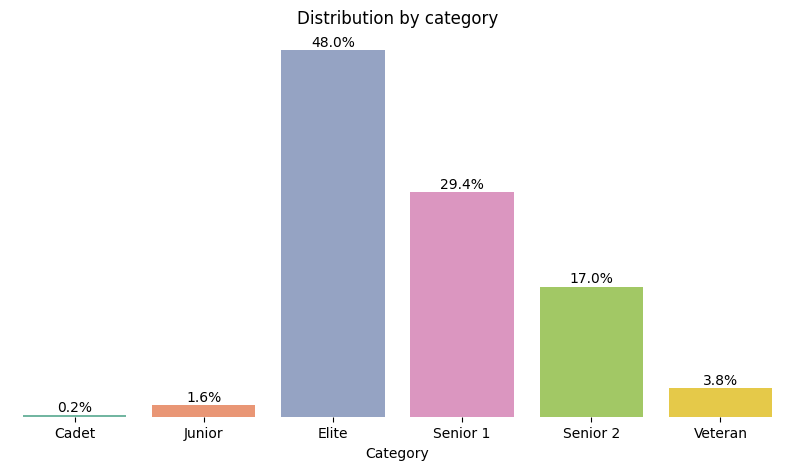

In [28]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.barplot(data = df_categorie,
                 x = "categorie",
                 y =  "distribution",
                 palette = "Set2",
                 order = ['Cadet','Junior','Elite','Senior 1','Senior 2','Veteran'])

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Category")
ax.yaxis.set_visible(False)
plt.title("Distribution by category")

# Add the values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.01), 
                ha='center', va='center')

plt.show()

### Par distance

In [29]:
df_categorie_distance = df_finish.groupby(['categorie', 'distance']).count()['dossard'].to_frame('distribution').reset_index()
df_categorie_distance['total_distance'] = df_categorie_distance.groupby('distance')['distribution'].transform('sum')
df_categorie_distance['percentage_distance'] = df_categorie_distance['distribution'] / df_categorie_distance['total_distance']
df_categorie_distance

,categorie,distance,distribution,total_distance,percentage_distance
0,Cadet,16,2,563,0.003552
1,Cadet,31,3,610,0.004918
2,Elite,16,309,563,0.548845
3,Elite,31,321,610,0.526230
4,Elite,51,241,509,0.473477
5,Elite,81,87,223,0.390135
6,Elite,111,115,331,0.347432
7,Junior,16,22,563,0.039076
8,Junior,31,8,610,0.013115
9,Junior,51,3,509,0.005894


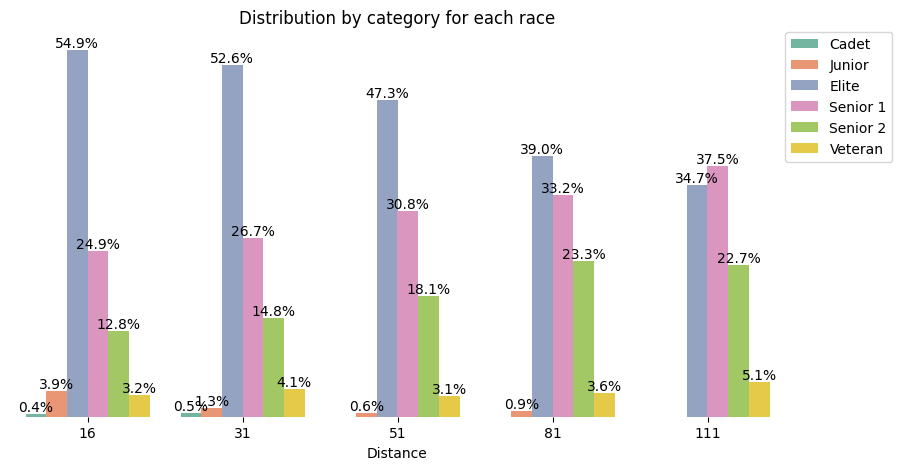

In [30]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.barplot(data = df_categorie_distance,
                 x = "distance",
                 y =  "percentage_distance",
                 hue = "categorie",
                 palette = "Set2",
                 hue_order = ['Cadet','Junior','Elite','Senior 1','Senior 2','Veteran'])

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
ax.yaxis.set_visible(False)
plt.title("Distribution by category for each race")

# Add the values on the bars
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()+0.01), 
                    ha='center', va='center')

# Change legend location so it does not overlap
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.show()

## **Participation par Nationalité** : 
Identifier les nationalités des participants et voir la répartition par course.

### General

In [31]:
df_pays = df_finish.pays.value_counts(normalize=True).to_frame("distribution").reset_index()
df_pays

,pays,distribution
0,SUI,0.473166
1,FRA,0.345707
2,BEL,0.033989
3,GER,0.025045
4,POR,0.017442
5,ESP,0.016100
6,ITA,0.011181
7,GBR,0.008945
8,CAN,0.008497
9,NED,0.008050


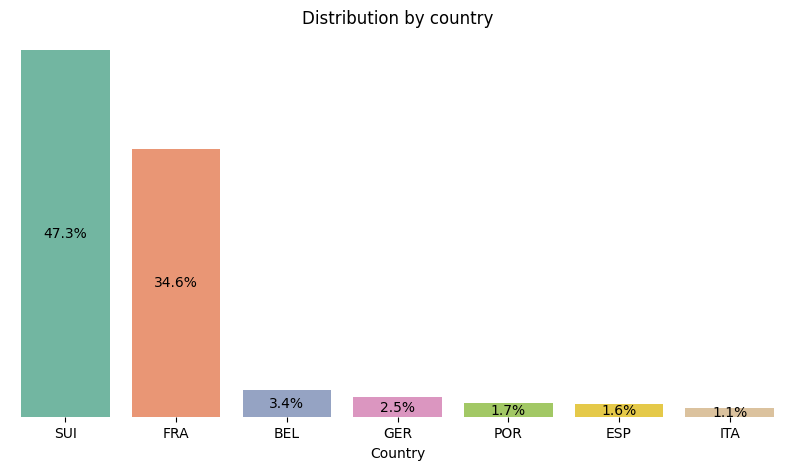

In [32]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.barplot(data = df_pays[df_pays.distribution >= 0.01],
                 x = "pays",
                 y =  "distribution",
                 palette = "Set2")

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Country")
ax.yaxis.set_visible(False)
plt.title("Distribution by country")

# Add the values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2, p.get_height()/2), 
                ha='center', va='center')

plt.show()

### Par distance

In [33]:
df_pays_distance = df_finish.groupby(['pays', 'distance']).count()['dossard'].to_frame('distribution').reset_index()
df_pays_distance['total_distance'] = df_pays_distance.groupby('distance')['distribution'].transform('sum')
df_pays_distance['percentage_distance'] = df_pays_distance['distribution'] / df_pays_distance['total_distance']
df_pays_distance.head()

,pays,distance,distribution,total_distance,percentage_distance
0,ALG,51,1,509,0.001965
1,ARG,31,1,610,0.001639
2,AUS,16,1,563,0.001776
3,AUS,51,3,509,0.005894
4,AUS,81,1,223,0.004484


In [34]:
# Only display top 5 countries with highest participation per race
top5_df_pays_distance_per_distance = (df_pays_distance.groupby('distance')
                                      .apply(lambda x: x.nlargest(5, 'percentage_distance'))
                                      .reset_index(drop=True))

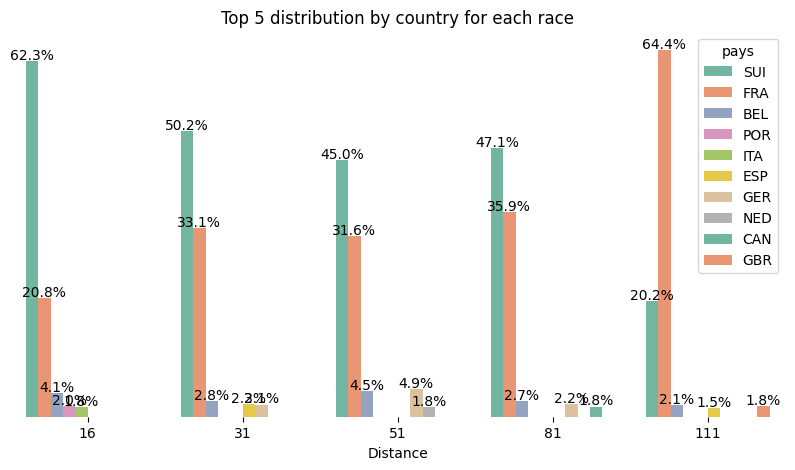

In [35]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.barplot(data = top5_df_pays_distance_per_distance,
                 x = "distance",
                 y =  "percentage_distance",
                 hue = "pays",
                 palette = "Set2")

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
ax.yaxis.set_visible(False)
plt.title("Top 5 distribution by country for each race")

# Add the values on the bars
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width() / 2, p.get_height() + 0.01), 
                    ha='center', va='center')

plt.show()

# 2. Analyse des Performances

## **Temps de Course par Sexe** : 
Comparer les temps de course moyens, médians, minimums et maximums entre les hommes et les femmes pour chaque distance.

### General

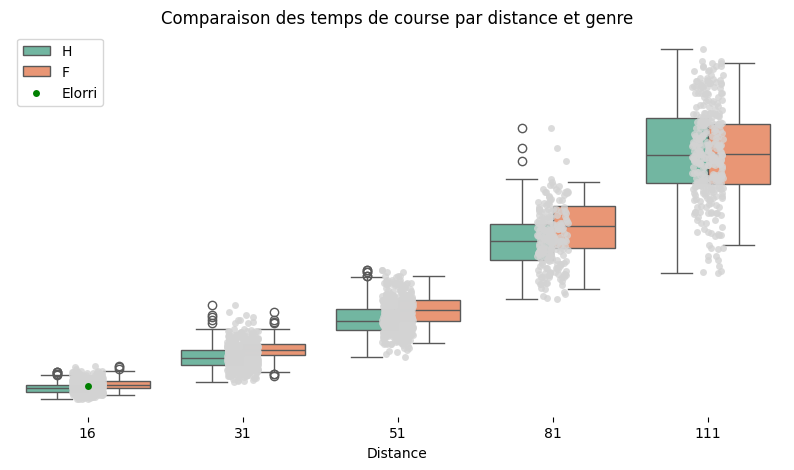

In [36]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.boxplot(data = df_finish, 
                 x = "distance",
                 y = "temps_seconds",
                 hue = "sexe",
                 palette = "Set2")

# Add every data point
sns.stripplot(data = df_finish, 
              x = "distance",
              y = "temps_seconds",
              color = "lightgrey",
              alpha = 0.8)

# Add specific point
sns.stripplot(data = df_finish[df_finish.dossard == 4184],
              x="distance",
              y="temps_seconds",
              color="green",
              s=5, 
              label="Elorri") 

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
ax.yaxis.set_visible(False)
plt.title("Comparaison des temps de course par distance et genre")

plt.show()

### RTS

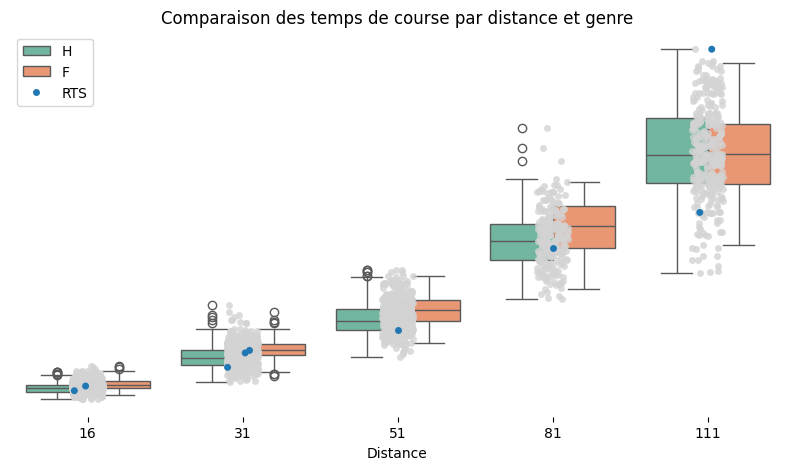

In [37]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.boxplot(data = df_finish, 
                 x = "distance",
                 y = "temps_seconds",
                 hue = "sexe",
                 palette = "Set2")

# Add every data point
sns.stripplot(data = df_finish, 
              x = "distance",
              y = "temps_seconds",
              color = "lightgrey",
              alpha = 0.8)

# Add specific point
sns.stripplot(data = df_finish[df_finish.club == "RTS"],
              x = "distance",
              y = "temps_seconds",
              hue = "club",
              s = 5) 

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
ax.yaxis.set_visible(False)
plt.title("Comparaison des temps de course par distance et genre")

# Remove legend title
plt.legend(title="") 

plt.show()

## **Temps de course par Catégorie** : 
Analyser les temps de course par catégorie d'âge.

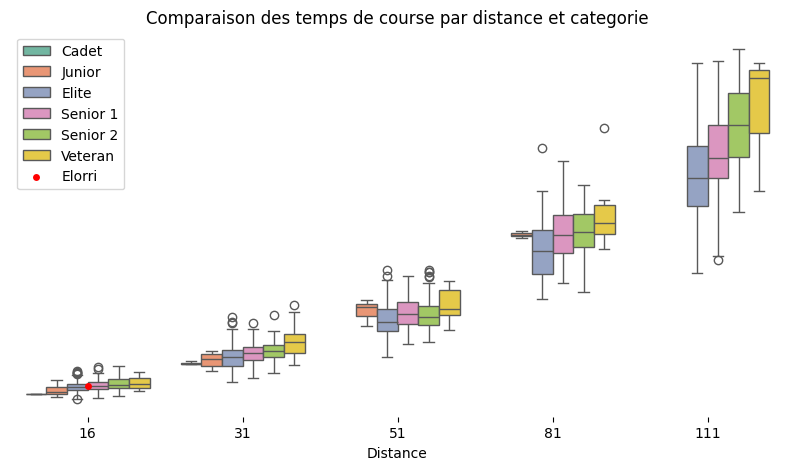

In [38]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.boxplot(data = df_finish, 
                 x = "distance",
                 y = "temps_seconds",
                 hue = "categorie",
                 palette = "Set2",
                hue_order = ['Cadet','Junior','Elite','Senior 1','Senior 2','Veteran'])

# Add specific point
sns.stripplot(data = df_finish[df_finish.dossard == 4184],
              x="distance",
              y="temps_seconds",
              color="red",
              s=5, 
              label="Elorri") 

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
ax.yaxis.set_visible(False)
plt.title("Comparaison des temps de course par distance et categorie")

plt.show()

## **Classement par Sexe**

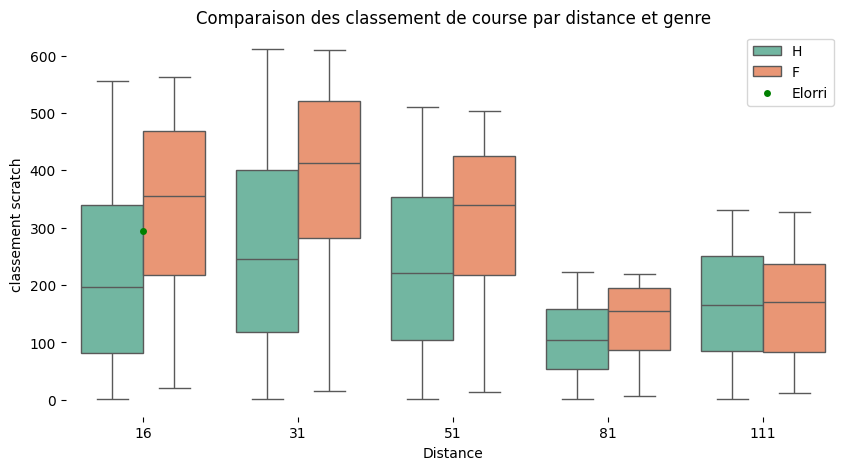

In [39]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.boxplot(data = df_finish, 
                 x = "distance",
                 y = "classement scratch",
                 hue = "sexe",
                 palette = "Set2")

# Add specific point
sns.stripplot(data = df_finish[df_finish.dossard == 4184],
              x="distance",
              y="classement scratch",
              color="green",
              s=5, 
              label="Elorri") 

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
#ax.yaxis.set_visible(False)
plt.title("Comparaison des classement de course par distance et genre")

plt.show()

## **Classement par Catégorie**

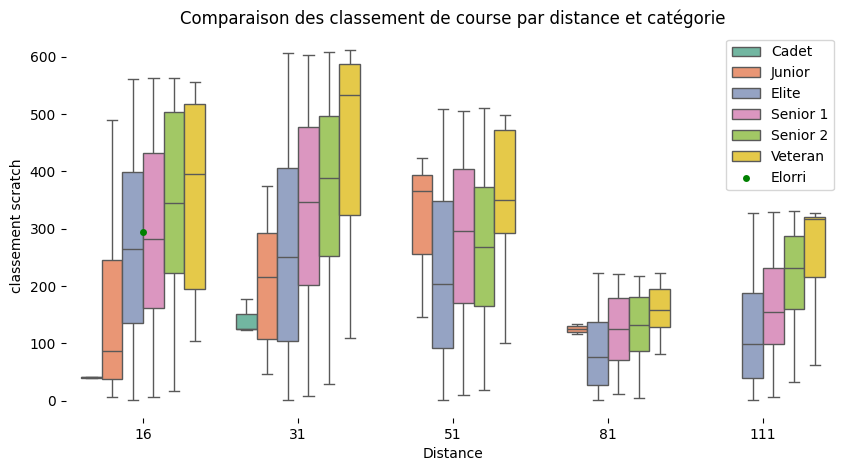

In [40]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.boxplot(data = df_finish, 
                 x = "distance",
                 y = "classement scratch",
                 hue = "categorie",
                 palette = "Set2",
                 hue_order = ['Cadet','Junior','Elite','Senior 1','Senior 2','Veteran'])

# Add specific point
sns.stripplot(data = df_finish[df_finish.dossard == 4184],
              x="distance",
              y="classement scratch",
              color="green",
              s=5, 
              label="Elorri") 

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
#ax.yaxis.set_visible(False)
plt.title("Comparaison des classement de course par distance et catégorie")

plt.show()

## **Classement du top 5 par Catégorie**

In [41]:
top5_categorie_sexe_per_distance = df_finish.sort_values(["categorie", "sexe","distance"]).groupby(["categorie", "sexe","distance"]).head(5)
top5_categorie_sexe_per_distance.head()

,classement scratch,dossard,nom prenom,club,sexe,categorie,pays,classement par categorie,classement par sexe,temps,distance,temps_seconds
177,178.0,3702,BONTOGNALI MARTA,NaN,F,Cadet,SUI,1.0,25.0,0 days 03:59:04,31,14344.0
39,40.0,4307,DELACROIX GABIN,GRAND BESANCON TRAIL ACADÉMIE,H,Cadet,FRA,1.0,35.0,0 days 01:34:02,16,5642.0
41,42.0,4143,GLAUSER FABIEN,USY ATHLÉTISME,H,Cadet,SUI,2.0,37.0,0 days 01:34:55,16,5695.0
123,124.0,3589,ESTELLI ARTHUR,NaN,H,Cadet,SUI,1.0,107.0,0 days 03:44:54,31,13494.0
124,125.0,3579,JAQUET ANDREA,ANCO,H,Cadet,SUI,2.0,108.0,0 days 03:44:54,31,13494.0


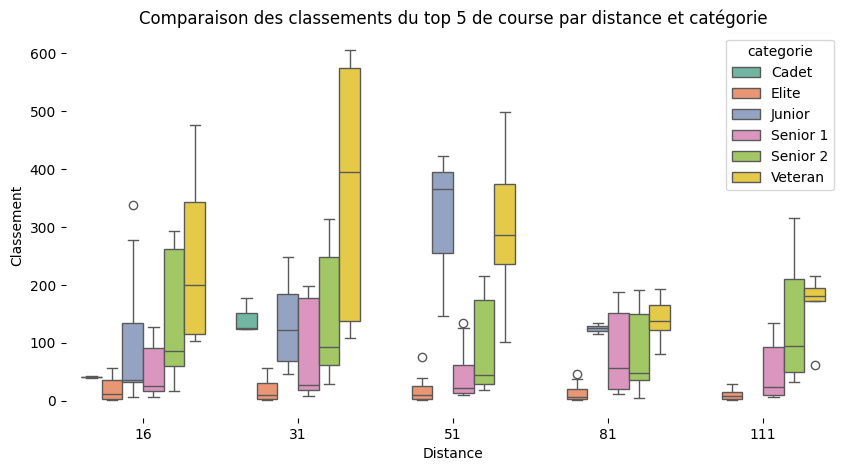

In [42]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.boxplot(data = top5_categorie_sexe_per_distance, 
                 x = "distance",
                 y = "classement scratch",
                 hue = "categorie",
                 palette = "Set2")

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
plt.ylabel("Classement")
plt.title("Comparaison des classements du top 5 de course par distance et catégorie")

plt.show()

## **Performance des Élites** : 
Étudier les performances des coureurs élites et les comparer avec les autres participants.

In [43]:
# Creation d'une nouvelle colonne Elite
df_finish['Elite'] = np.where(df_finish['categorie']=='Elite','Elite','Non Elite')

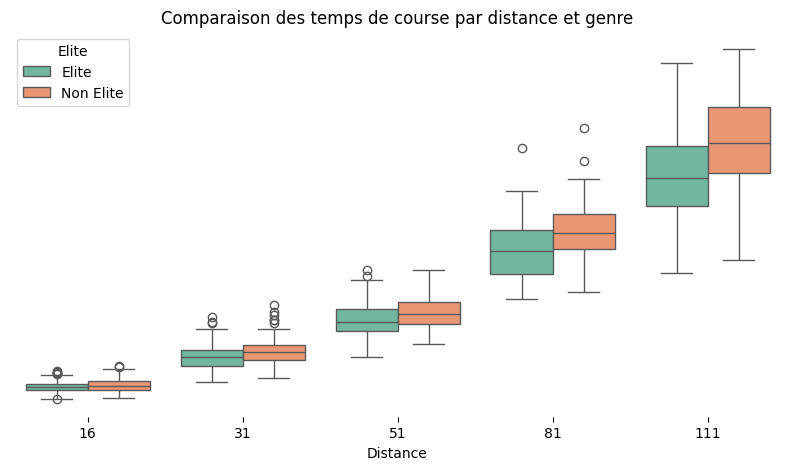

In [44]:
fig = plt.figure(figsize = (10, 5))

# Bar plot
ax = sns.boxplot(data = df_finish, 
                 x = "distance",
                 y = "temps_seconds",
                 hue = "Elite",
                 palette = "Set2")

# Remove the box
sns.despine(bottom = True, left = True)

# Axis and title
plt.xlabel("Distance")
ax.yaxis.set_visible(False)
plt.title("Comparaison des temps de course par distance et genre")

plt.show()